# Сборный проект 2

Необходимо подготовить прототип модели машинного обучения для компании «Цифры», которая разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды на основании данных с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.<br>Нам нужно:
1.	Подготовить данные;
2.	Провести исследовательский анализ данных;
3.	Построить и обучить модель.

## Шаг 1. Общий обзор и подготовка данных

### 1.1. Общий обзор

In [307]:
import pandas as pd #подключаем необходимые библиотеки
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor

In [218]:
try:
    gold_recovery_train = pd.read_csv("D:\datasets\gold_recovery_train_new.csv", sep = ',') #записываем данные из файла в переменную df
except:
    gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', sep = ',') #записываем данные из файла в переменную df
try:
    gold_recovery_test = pd.read_csv("D:\datasets\gold_recovery_test_new.csv", sep = ',') #записываем данные из файла в переменную df
except:
    gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', sep = ',') #записываем данные из файла в переменную df
try:
    gold_recovery_full = pd.read_csv("D:\datasets\gold_recovery_full_new.csv", sep = ',') #записываем данные из файла в переменную df
except:
    gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', sep = ',') #записываем данные из файла в переменную df

In [219]:
gold_recovery_train = gold_recovery_train.set_index('date')# устанавливаем столбец с датой в качестве индекса во всех датасетах
gold_recovery_test = gold_recovery_test.set_index('date')
gold_recovery_full = gold_recovery_full.set_index('date')

In [220]:
C = gold_recovery_train['rougher.output.concentrate_au']# доля золота в концентрате после флотации
F = gold_recovery_train['rougher.input.feed_au']# доля золота в сырье до флотации
T = gold_recovery_train['rougher.output.tail_au']# доля золота в отвальных хвостах после флотации

In [221]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [222]:
gold_recovery_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [223]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [224]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [225]:
gold_recovery_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [226]:
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [227]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [228]:
gold_recovery_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [229]:
gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


В датасетах присутствуют пропуски в признаках, данные являются количественными непрерывными. В сырых данных больше пропусков, есть нули в признаках и выбросы. В тренировочном датасете почти в три раза больше строк, соотношение под

### 1.2. Проверка расчета эффективности обогащения

Необходимо проверить, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между нашими расчётами и значением признака.

In [230]:
recovery = (C * (F - T))/(F * (C - T)) * 100# расчет эффективности обогащения
mean_absolute_error(gold_recovery_train['rougher.output.recovery'], recovery)# mae

9.73512347450521e-15

Отличие незначительное, эффективность обогащения в данных рассчитана верно

### 1.3. Анализ признаков

Рассмотрим, каких признаков нет в тестовой выборке

In [231]:
set(gold_recovery_train.columns).difference(set(gold_recovery_test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке нет данных о финальном количестве ценных металлов, эффективности и отвальном хвосте, нет данных о параметрах продукта после первичной очистки в концентрате и хвосте, нет большинства данных о финальном количестве продукта поле флотации и эффективности, а также о продуктах в хвостах после повторной очистки.<br>Отсутствуют целевые признаки, необходимые для расчета итоговой метрики sMAPE - **rougher.output.recovery** и **final.output.recovery**

### 1.4 Подготовка данных и признаков

Удалим дубликаты

In [232]:
gold_recovery_train = gold_recovery_train.drop_duplicates()# избавляемся от очевидных повторов
gold_recovery_test = gold_recovery_test.drop_duplicates()
gold_recovery_full = gold_recovery_full.drop_duplicates()

In [233]:
gold_recovery_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [234]:
gold_recovery_train = gold_recovery_train.bfill(axis ='columns')# заполняем пропуски следующим значением, так как индексация идет по времени, а соседние значения похожи по определению
gold_recovery_test = gold_recovery_test.bfill(axis ='columns')
gold_recovery_full = gold_recovery_full.bfill(axis ='columns')

In [235]:
gold_recovery_test['rougher.output.recovery'] = gold_recovery_full.loc[gold_recovery_test.index, 'rougher.output.recovery']# добавим некоторые признаки и целевые признаки из сырых данных по индексу в тестовую выборку
gold_recovery_test['final.output.recovery'] = gold_recovery_full.loc[gold_recovery_test.index, 'final.output.recovery']
gold_recovery_test = gold_recovery_test[sorted(gold_recovery_test.columns)]# отсортируем столбцы, чтобы не было ошибок при обучении
gold_recovery_full = gold_recovery_full[sorted(gold_recovery_full.columns)]
gold_recovery_train = gold_recovery_train[sorted(gold_recovery_train.columns)]

In [239]:
gold_recovery_train = gold_recovery_train.dropna()  # удаляем оставшиеся пропуски
gold_recovery_test = gold_recovery_test.dropna()
gold_recovery_full = gold_recovery_full.dropna()

Выделим признаки в выборках и применим масштабирование. Обучать будем по две модели, так как признаков - два.

In [241]:
features_train_rougher = gold_recovery_train.drop(gold_recovery_train.columns.difference(gold_recovery_test.columns), axis=1).drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)# удаляем целевой признак и признаки, которых нет в test
features_train_final = gold_recovery_train.drop(gold_recovery_train.columns.difference(gold_recovery_test.columns), axis=1).drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test_rougher = gold_recovery_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test_final = gold_recovery_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = gold_recovery_train['rougher.output.recovery']
target_train_final = gold_recovery_train['final.output.recovery']
target_test_rougher = gold_recovery_test['rougher.output.recovery']
target_test_final = gold_recovery_test['final.output.recovery']
scaler = StandardScaler()# масштабируем признаки
features_train_rougher = scaler.fit_transform(features_train_rougher)
features_test_rougher = scaler.transform(features_test_rougher)
features_train_final = scaler.fit_transform(features_train_final)
features_test_final = scaler.transform(features_test_final)

In [242]:
print(f'Размеры тренировочных выборок: финальные признаки - {features_train_final.shape}, финальный целевой признак - {target_train_final.shape}, флотационные признаки - {features_train_rougher.shape}, флотационный целевой признак - {target_train_rougher.shape}')

Размеры тренировочных выборок: финальные признаки - (14148, 52), финальный целевой признак - (14148,), флотационные признаки - (14148, 52), флотационный целевой признак - (14148,)


In [243]:
print(f'Размеры тестовых выборок: финальные признаки - {features_test_final.shape}, финальный целевой признак - {target_test_final.shape}, флотационные признаки - {features_test_rougher.shape}, флотационный целевой признак - {target_test_rougher.shape}')

Размеры тестовых выборок: финальные признаки - (5290, 52), финальный целевой признак - (5290,), флотационные признаки - (5290, 52), флотационный целевой признак - (5290,)


## Шаг 2. Анализ показателей

### 2.1. Изменение концентрации металлов на разных этапах очистки

#### Au


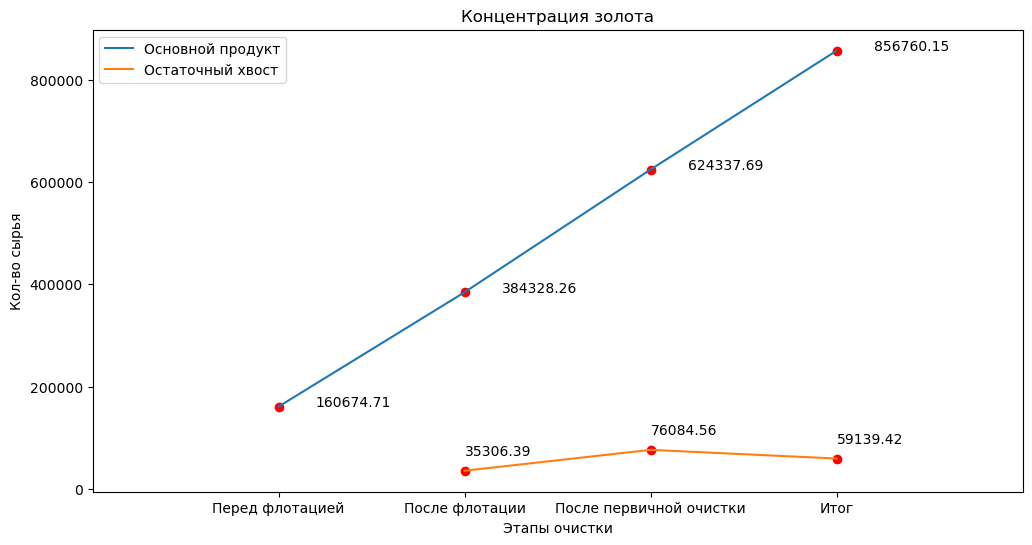

In [244]:
au = [gold_recovery_full['rougher.input.feed_au'].sum(),
     gold_recovery_full['rougher.output.concentrate_au'].sum(),
     gold_recovery_full['primary_cleaner.output.concentrate_au'].sum(),
     gold_recovery_full['final.output.concentrate_au'].sum()]# задаем точки на графике по сумме металла на каждом этапе
x = [1, 2, 3, 4]
y1 = [gold_recovery_full['rougher.output.tail_au'].sum(),
      gold_recovery_full['primary_cleaner.output.tail_au'].sum(),
      gold_recovery_full['final.output.tail_au'].sum()]# задаем точки на графике по сумме металла на каждом этапе в хвосте
x1 = [2, 3, 4]
plt.figure(figsize=(12, 6))
plt.plot(x, au, label='Основной продукт')
plt.title('Концентрация золота')
plt.xlabel('Этапы очистки')
plt.ylabel('Кол-во сырья')
plt.xlim(0,5)
plt.xticks(x, ['Перед флотацией', 'После флотации', 'После первичной очистки', 'Итог'])
plt.scatter(x, au, marker='o', color='r')# добавляем точки на график
for i in range(0, 4):
    plt.annotate(str(round(au[i],2)), xy=(x[i], au[i]), xytext=(x[i]+0.2, au[i]))# подписываем значения точек
plt.plot(x1, y1, label='Остаточный хвост')
plt.xlim(0,5)
plt.scatter(x1, y1, marker='o', color='r')# добавляем точки на график
for i in range(0, 3):
    plt.annotate(str(round(y1[i],2)), xy=(x1[i], au[i]), xytext=(x1[i], y1[i]+30000))# подписываем значения точек
plt.legend()
plt.show()

Концентрация золота от начала процесса до конца увеличилась более чем в 5 раз, более чем в 2 раза после флотации, более чем в полтора раза после первой очистки, более чем в 1.3 раза после повторной очистки. В хвосте концентрация металла сравнительно небольшая, увеличивается в два раза после первичной очистки, и в итоге составляет около 7 процентов от финального продукта.

#### Ag

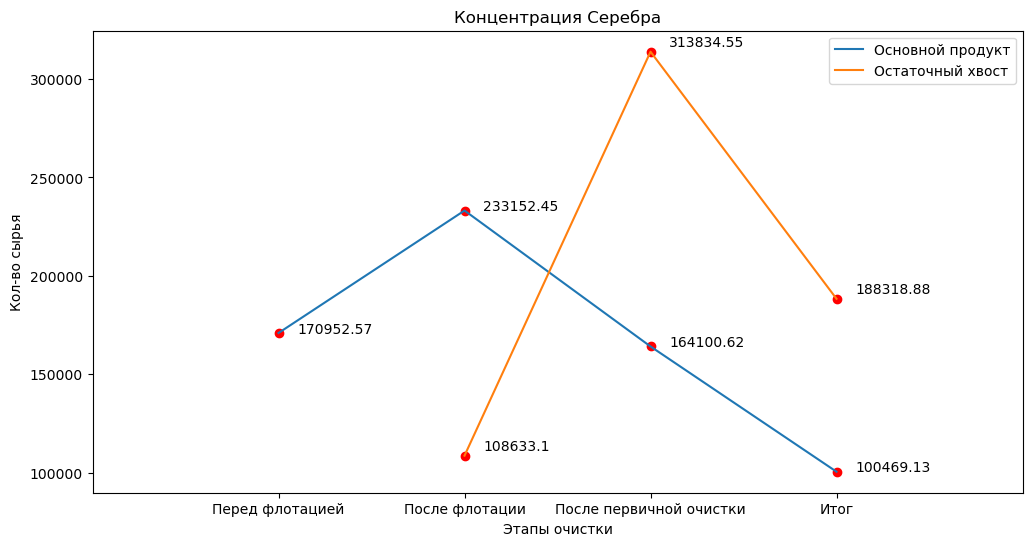

In [245]:
ag = [gold_recovery_full['rougher.input.feed_ag'].sum(),
     gold_recovery_full['rougher.output.concentrate_ag'].sum(),
     gold_recovery_full['primary_cleaner.output.concentrate_ag'].sum(),
     gold_recovery_full['final.output.concentrate_ag'].sum()]# задаем точки на графике по сумме металла на каждом этапе
x = [1, 2, 3, 4]
y1 = [gold_recovery_full['rougher.output.tail_ag'].sum(),
      gold_recovery_full['primary_cleaner.output.tail_ag'].sum(),
      gold_recovery_full['final.output.tail_ag'].sum()]# задаем точки на графике по сумме металла на каждом этапе в хвосте
x1 = [2, 3, 4]
plt.figure(figsize=(12, 6))
plt.plot(x, ag, label='Основной продукт')
plt.title('Концентрация Серебра')
plt.xlabel('Этапы очистки')
plt.ylabel('Кол-во сырья')
plt.xlim(0,5)
plt.xticks(x, ['Перед флотацией', 'После флотации', 'После первичной очистки', 'Итог'])
plt.scatter(x, ag, marker='o', color='r')# добавляем точки на график
for i in range(0, 4):
    plt.annotate(str(round(ag[i],2)), xy=(x[i], ag[i]), xytext=(x[i]+0.1, ag[i]+0.1))# подписываем значения точек
plt.plot(x1, y1, label='Остаточный хвост')
plt.xlim(0,5)
plt.scatter(x1, y1, marker='o', color='r')# добавляем точки на график
for i in range(0, 3):
    plt.annotate(str(round(y1[i],2)), xy=(x1[i], ag[i]), xytext=(x1[i]+0.1, y1[i]+3000))# подписываем значения точек
plt.legend()
plt.show()

С концентрацией золота результат другой: после флотации концентрация увеличилась почти в 1.3 раза, далее пошла на спад. Итоговая концентрация в финальном сырье уменьшилась в 1.7 раз. Остаточный хвост тут больше, чем в основном продукте - это значит, что на двух этапах очистки упор идет именно на отделение серебра от золота. Финальная концентрация серебра в хвосте почти в два раза больше, чем в продукте.

#### Pb

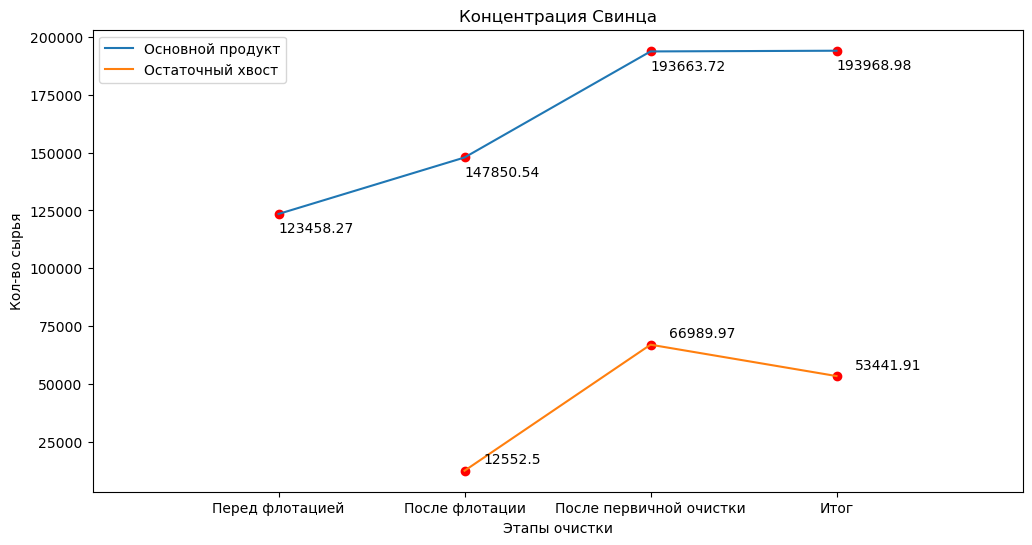

In [246]:
pb = [gold_recovery_full['rougher.input.feed_pb'].sum(),
     gold_recovery_full['rougher.output.concentrate_pb'].sum(),
     gold_recovery_full['primary_cleaner.output.concentrate_pb'].sum(),
     gold_recovery_full['final.output.concentrate_pb'].sum()]# задаем точки на графике по сумме металла на каждом этапе
x = [1, 2, 3, 4]
y1 = [gold_recovery_full['rougher.output.tail_pb'].sum(),
      gold_recovery_full['primary_cleaner.output.tail_pb'].sum(),
      gold_recovery_full['final.output.tail_pb'].sum()]# задаем точки на графике по сумме металла на каждом этапе в хвосте
x1 = [2, 3, 4]
plt.figure(figsize=(12, 6))
plt.plot(x, pb, label='Основной продукт')
plt.title('Концентрация Свинца')
plt.xlabel('Этапы очистки')
plt.ylabel('Кол-во сырья')
plt.xlim(0,5)
plt.xticks(x, ['Перед флотацией', 'После флотации', 'После первичной очистки', 'Итог'])
plt.scatter(x, pb, marker='o', color='r')# добавляем точки на график
for i in range(0, 4):
    plt.annotate(str(round(pb[i],2)), xy=(x[i], pb[i]), xytext=(x[i], pb[i]-8000))# подписываем значения точек
plt.plot(x1, y1, label='Остаточный хвост')
plt.xlim(0,5)
plt.scatter(x1, y1, marker='o', color='r')# добавляем точки на график
for i in range(0, 3):
    plt.annotate(str(round(y1[i],2)), xy=(x1[i], pb[i]), xytext=(x1[i]+0.1, y1[i]+3000))# подписываем значения точек
plt.legend()
plt.show()

Концентрация свинца увеличилась после флотации и первичной очистки, повторная очистка практически не повлияла на его концентрацию. Тенденция концентрации свинца в отвальном хваосте похожа на золото, однако составляет около 30% от финального продукта.

### 2.2. Распределения размеров гранул сырья на обучающей и тестовой выборках

#### Распределение размеров гранул до флотации

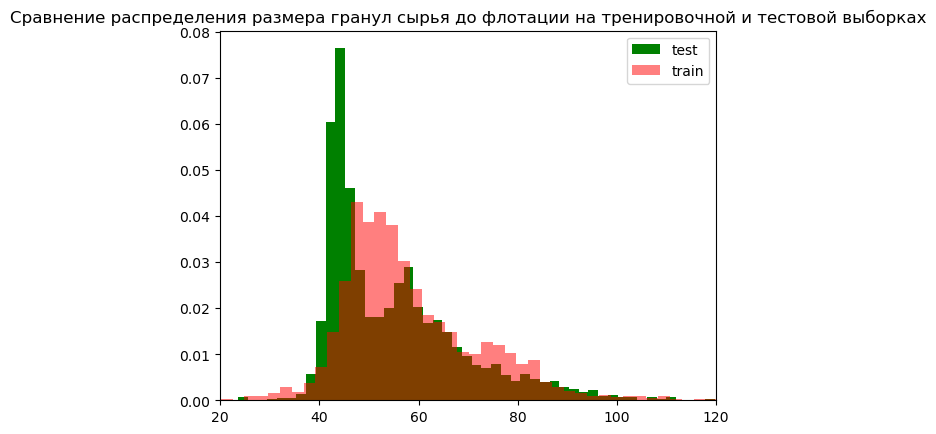

In [247]:
x = gold_recovery_test['rougher.input.feed_size']
y = gold_recovery_train['rougher.input.feed_size']

plt.hist(x, 200,
         histtype ='bar',
         color = 'green',
         label='test', density=True)
plt.hist(y, 200,
         histtype ='bar',
         color = 'red',
         label='train', alpha=0.5, density=True)
plt.title('Сравнение распределения размера гранул сырья до флотации на тренировочной и тестовой выборках')
plt.xlim(20, 120)
plt.legend()
plt.show()

Распределения размеров гранул имеют схожую форму, однако в train график сдвинулся вправо по оси х - большинство гранул в train имеют больший размер, чем в test. Распределения хоть и похожи по своей форме, но размеры гранул в выборках сильно отличаются.

#### Распределение размеров гранул до первичной очистки

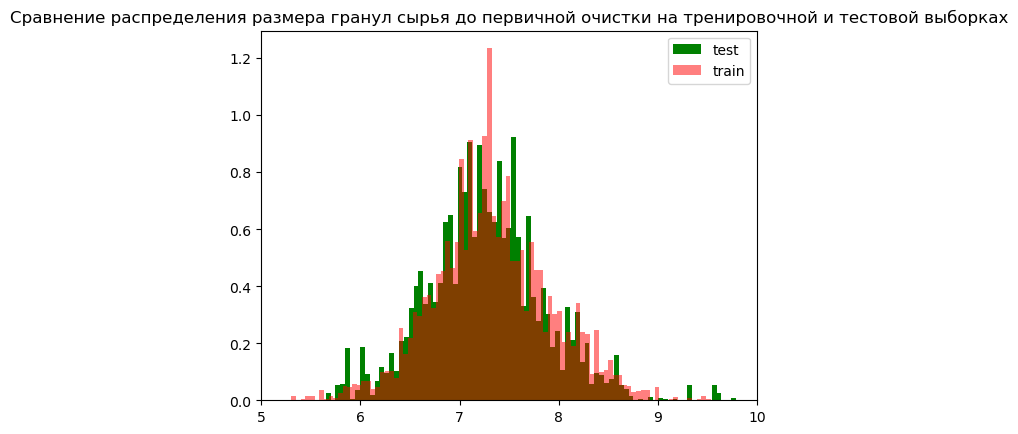

In [248]:
x = gold_recovery_test['primary_cleaner.input.feed_size']
y = gold_recovery_train['primary_cleaner.input.feed_size']

plt.hist(x, 200,
         histtype ='bar',
         color = 'green',
         label='test', density=True)
plt.hist(y, 200,
         histtype ='bar',
         color = 'red',
         label='train', alpha=0.5, density=True)
plt.title('Сравнение распределения размера гранул сырья до первичной очистки на тренировочной и тестовой выборках')
plt.xlim(5, 10)
plt.legend()
plt.show()

Распределение размера гранул достаточно близко в test и train перед первичной очисткой, отличается только количество наблюдений

### 2.3. Суммарная концентрация всех веществ на разных стадиях

#### До флотации

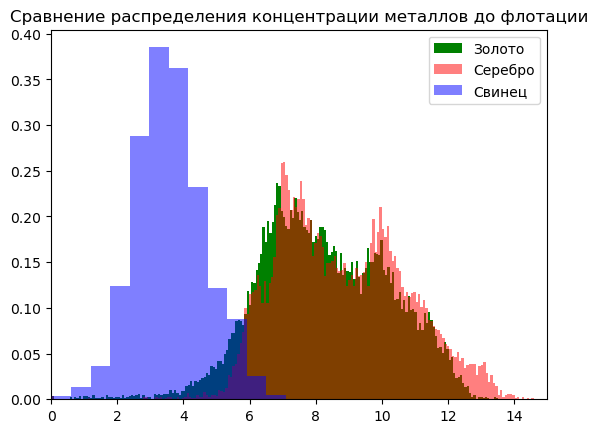

In [249]:
x = gold_recovery_full['rougher.input.feed_au']
y = gold_recovery_full['rougher.input.feed_ag']
z = gold_recovery_full['rougher.input.feed_pb']
plt.hist(x, 200,
         histtype ='bar',
         color = 'green',
         label='Золото', density=True)
plt.hist(y, 200,
         histtype ='bar',
         color = 'red',
         label='Серебро', alpha=0.5, density=True)
plt.hist(z, 1000,
         histtype ='bar',
         color = 'blue',
         label='Свинец', alpha=0.5, density=True)
plt.title('Сравнение распределения концентрации металлов до флотации')
plt.xlim(0, 15)
plt.legend()
plt.show()

Концентрации золота и серебра в изначальном сырье практически не отличаются, свинца в целомменьше и в основном он присутвует в меньших количествах

После флотации

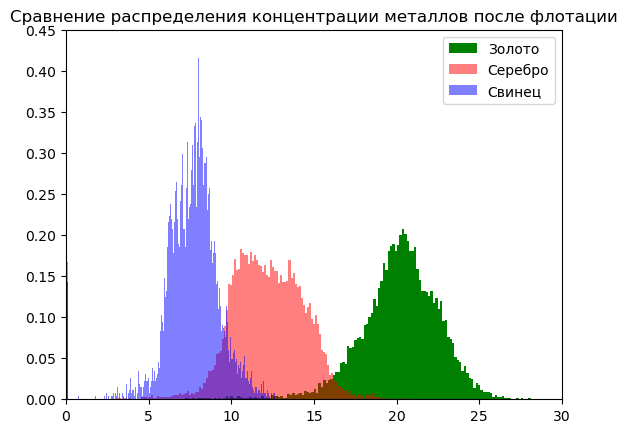

In [253]:
x = gold_recovery_full['rougher.output.concentrate_au']
y = gold_recovery_full['rougher.output.concentrate_ag']
z = gold_recovery_full['rougher.output.concentrate_pb']
plt.hist(x, 200,
         histtype ='bar',
         color = 'green',
         label='Золото', density=True)
plt.hist(y, 200,
         histtype ='bar',
         color = 'red',
         label='Серебро', alpha=0.5, density=True)
plt.hist(z, 1000,
         histtype ='bar',
         color = 'blue',
         label='Свинец', alpha=0.5, density=True)
plt.title('Сравнение распределения концентрации металлов после флотации')
plt.xlim(0, 30)
plt.ylim(0, 0.45)
plt.legend()
plt.show()

Концентрации металлов после флотации изменились, золота стало больше, чем серебра

После очистки

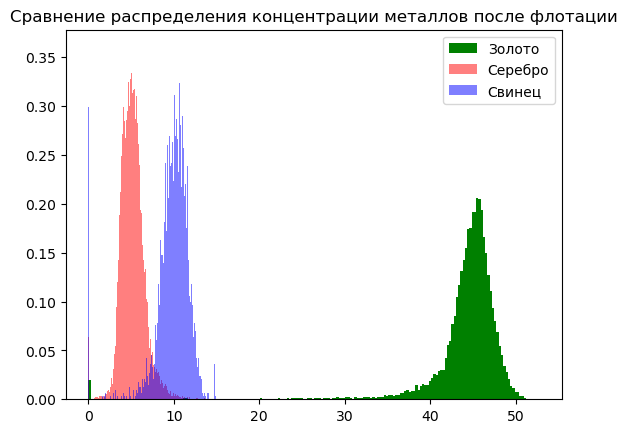

In [257]:
x = gold_recovery_full['final.output.concentrate_au']
y = gold_recovery_full['final.output.concentrate_ag']
z = gold_recovery_full['final.output.concentrate_pb']
plt.hist(x, 200,
         histtype ='bar',
         color = 'green',
         label='Золото', density=True)
plt.hist(y, 200,
         histtype ='bar',
         color = 'red',
         label='Серебро', alpha=0.5, density=True)
plt.hist(z, 1000,
         histtype ='bar',
         color = 'blue',
         label='Свинец', alpha=0.5, density=True)
plt.title('Сравнение распределения концентрации металлов после флотации')

plt.legend()
plt.show()

В первоначальном сырье концентрация золота и серебра примерно одинаковая, далее количество золота постепенно увеличивается. В финальном продукте серебра меньше, чем свинца. Также в данных присутствую выбросы - нулевые значения концентрации металлов. В обучении модели эти признаки не используются.

## Шаг 3. Построение моделей

### 3.1. Функция для вычисления метрики sMAPE

In [282]:
def sMAPE(true, pred):
    return np.mean(2.0 * np.abs(true - pred) / (np.abs(true) + np.abs(pred))) * 100# формула SMAPe
def sMAPE_final(rougher, final):
    return rougher * 0.25 + final * 0.75# итоговое SMAPe
smape_score = make_scorer(sMAPE, greater_is_better=False)# делаем метрику из функции оценочной для дальнейшего применения в кросс-валидации

### 3.2. Обучение моделей

#### Линейная регрессия

In [297]:
%%time
model_r = LinearRegression()# обучаем модель предсказывать результат флотации и считаем оценку кросс-валидации
final_scores_r = cross_val_score(model_r, features_train_rougher, target_train_rougher, cv=5, scoring=smape_score).mean()

model_f = LinearRegression()# обучаем модель предсказывать финальный результат и считаем оценку кросс-валидации
final_scores_f = cross_val_score(model_f, features_train_final, target_train_final, cv=5, scoring=smape_score).mean()

print(f'Оценка кросс-валидации "модели флотации": {round(abs(final_scores_r),2)}%')
print(f'Оценка кросс-валидации "финальной модели": {round(abs(final_scores_f),2)}%')
print(f'Итоговый sMAPE модели: {round(abs(sMAPE_final(final_scores_r, final_scores_f)), 2)}%')

Оценка кросс-валидации "модели флотации": 12.04%
Оценка кросс-валидации "финальной модели": 12.44%
Итоговый sMAPE модели: 12.34%


#### Решающее дерево

Подберем параметры модели с помощью RandomizedSearchCV

In [298]:
%%time
tree = DecisionTreeRegressor(random_state=12345)
param_dist = {"max_depth": range(1, 50)}
rsc = RandomizedSearchCV(tree, param_dist, scoring=smape_score)#используем RandomizedSearchCV для подбора параметров
search_r = rsc.fit(features_train_rougher, target_train_rougher)
print(f'Лучшие параметры для "модели флотации": {search_r.best_params_}')
search_f = rsc.fit(features_train_final, target_train_final)
print(f'Лучшие параметры длф "финальной модели": {search_f.best_params_}')

Лучшие параметры для "модели флотации": {'max_depth': 4}
Лучшие параметры длф "финальной модели": {'max_depth': 7}
Wall time: 1min 10s


Проверим метрики с подобранными параметрами

In [299]:
%%time
model_r = DecisionTreeRegressor(max_depth=search_r.best_params_['max_depth'], random_state=12345)# обучаем модель предсказывать результат флотации и считаем оценку кросс-валидации
final_scores_r = cross_val_score(model_r, features_train_rougher, target_train_rougher, cv=5, scoring=smape_score).mean()

model_f = DecisionTreeRegressor(max_depth=search_f.best_params_['max_depth'], random_state=12345)# обучаем модель предсказывать финальный результат и считаем оценку кросс-валидации
final_scores_f = cross_val_score(model_f, features_train_final, target_train_final, cv=5, scoring=smape_score).mean()

print(f'Оценка кросс-валидации "модели флотации": {round(abs(final_scores_r),2)}%')
print(f'Оценка кросс-валидации "финальной модели": {round(abs(final_scores_f),2)}%')
print(f'Итоговый sMAPE модели: {round(abs(sMAPE_final(final_scores_r, final_scores_f)), 2)}%')

Оценка кросс-валидации "модели флотации": 12.38%
Оценка кросс-валидации "финальной модели": 12.31%
Итоговый sMAPE модели: 12.33%
Wall time: 3.28 s


Результат итоговой метрики модели решающего дерева немного лучше, чем у линейной регрессии.

#### Случайный лес

Подберем параметры модели с помощью RandomizedSearchCV

In [301]:
%%time
forest = RandomForestRegressor(random_state=12345)
param_dist = {"max_depth": range(3, 10), 'n_estimators': range(50, 151, 25)}
rsc = RandomizedSearchCV(forest, param_dist, scoring=smape_score)# используем RandomizedSearchCV для подбора параметров
search_r = rsc.fit(features_train_rougher, target_train_rougher)
print(f'Лучшие параметры для "модели флотации": {search_r.best_params_}')
search_f = rsc.fit(features_train_final, target_train_final)
print(f'Лучшие параметры длф "финальной модели": {search_f.best_params_}')

Лучшие параметры для "модели флотации": {'n_estimators': 100, 'max_depth': 6}
Лучшие параметры длф "финальной модели": {'n_estimators': 125, 'max_depth': 5}
Wall time: 27min 17s


Проверим метрики с подобранными параметрами

In [302]:
%%time
model_r = RandomForestRegressor(max_depth=search_r.best_params_['max_depth'], n_estimators=search_f.best_params_['n_estimators'], random_state=12345)# обучаем модель предсказывать результат флотации и считаем оценку кросс-валидации
final_scores_r = cross_val_score(model_r, features_train_rougher, target_train_rougher, cv=5, scoring=smape_score).mean()

model_f = RandomForestRegressor(max_depth=search_f.best_params_['max_depth'], n_estimators=search_f.best_params_['n_estimators'],random_state=12345)# обучаем модель предсказывать финальный результат и считаем оценку кросс-валидации
final_scores_f = cross_val_score(model_f, features_train_final, target_train_final, cv=5, scoring=smape_score).mean()

print(f'Оценка кросс-валидации "модели флотации": {round(abs(final_scores_r),2)}%')
print(f'Оценка кросс-валидации "финальной модели": {round(abs(final_scores_f),2)}%')
print(f'Итоговый sMAPE модели: {round(abs(sMAPE_final(final_scores_r, final_scores_f)), 2)}%')

Оценка кросс-валидации "модели флотации": 11.33%
Оценка кросс-валидации "финальной модели": 10.18%
Итоговый sMAPE модели: 10.47%
Wall time: 3min 12s


Лучшей моделью оказался случайный лес, проверим его на тестовой выборке и сравним с константной моделью

### 3.2. Проверка лучшей модели на тестовой выборке

In [305]:
model_r.fit(features_train_rougher, target_train_rougher)
predictions_test_r = model_r.predict(features_test_rougher)
best_smape_test_r = sMAPE(target_test_rougher, predictions_test_r)
print(f'sMAPE модели на флотации на тестовой выборке: {round(best_smape_test_r, 2)}%')
model_f.fit(features_train_final, target_train_final)
predictions_test_f = model_f.predict(features_test_final)
best_smape_test_f = sMAPE(target_test_final, predictions_test_f)
print(f'sMAPE модели в итоге на тестовой выборке: {round(best_smape_test_f, 2)}%')
print()
print(f'Итоговый sMAPE модели на тестовой выборке: {round(sMAPE_final(best_smape_test_r, best_smape_test_f), 2)}%')

sMAPE модели на флотации на тестовой выборке: 10.26%
sMAPE модели в итоге на тестовой выборке: 9.5%

Итоговый sMAPE модели на тестовой выборке: 9.69%


Результаты близки к оценке кросс-валидацией, итоговая модель хорошо делает предсказания

Проверим модель на адекватность, сравним с константной моделью DummyRegressor

In [312]:
dummy_regr_r = DummyRegressor()
dummy_regr_r.fit(features_train_rougher, target_train_rougher)
predictions_dummy_r = dummy_regr_r.predict(features_test_rougher)
dummy_smape_test_r = sMAPE(target_test_rougher, predictions_dummy_r)
print(f'sMAPE модели на флотации на тестовой выборке: {round(dummy_smape_test_r, 2)}%')

dummy_regr_f = DummyRegressor()
dummy_regr_f.fit(features_train_final, target_train_final)
predictions_dummy_f = dummy_regr_f.predict(features_test_final)
dummy_smape_test_f = sMAPE(target_test_final, predictions_dummy_f)
print(f'sMAPE модели в итоге на тестовой выборке: {round(dummy_smape_test_f, 2)}%')
print()
print(f'Итоговый sMAPE модели на тестовой выборке: {round(sMAPE_final(dummy_smape_test_r, dummy_smape_test_f), 2)}%')

sMAPE модели на флотации на тестовой выборке: 10.38%
sMAPE модели в итоге на тестовой выборке: 10.26%

Итоговый sMAPE модели на тестовой выборке: 10.29%


Результаты константной модели хуже, чем на тестовой выборке, предсказания адекватны

## Вывод

В рамках проекта была проделана следующая работа:
1. Проведен общий обзор данных, определена задача для обучения модели
2. Проверены расчеты эффективности обогащения в данных
3. Проанализированы признаки, проведена предобработка, данные были поделены на выборки для обучения двух моделей по двум целевым признакам
4. Проведен исследовательский анализ изменения концентраций металлов на разных этапах очистки, сравнили распределение размеров гранул сырья на обучающей и тестовой выборке
5. Подобраны параметры и обучены модели разных видов для задачи регрессии, выбрана лучшая - ***RandomForestRegressor***, посчитаны метрики sMAPE и оценка кросс-валидации
6. Лучшая модель проверена на тестовой выборке и проверена на адекватность

Модель случайного леса поможет предсказать коэффициент восстановления золота из золотосодержащей руды и оптимизировать производство, чтобы не запускать предприятия с убыточной добычей ископаемых